# Problem 8.2

**Attributions**: Elena, Michelle with minor inputs from Shashank.

Let's import our numerical workhorses.

In [3]:
import warnings
import os
import time
import itertools

# Our numerical workhorse
import numpy as np
import scipy
import pandas as pd
import bebi103

# Image processing tools
import skimage
import skimage.io
import skimage.filters
import skimage.morphology
import skimage.feature
import skimage.segmentation
import skimage.measure

# Import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Suppress future warnings
warnings.filterwarnings('ignore')

Let's read the original image, and save a copy to display next to the edited one.

In [4]:
im_original = skimage.io.imread('./data/swirl.png')
im = skimage.io.imread('./data/swirl.png')

In order to identify the specific color codes for beige and magenta, let's look at the pixel values in the red channel, followed by the green and blue channels. We will just look at part of the top row of pixels, in a region that encompasses all the colors in the image.

In [5]:
print(im_original[0, 0:250, 0])
print(im_original[0, 0:250, 1])
print(im_original[0, 0:250, 2])

[200 200 200 200   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 250 250 250 250
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

Looking at these arrays, we can see that there are actually just three colors in the image. The second color is the greenish-blue one that we want to keep, which is 0 in the red channel, 200 in the green channel, and 100 in the blue channel. Based on this, let's change all other values in the three channels to 255. This will replace magenta and beige with white.

In [6]:
im[:,:,0][np.where(im[:,:,0] != 0)] = 255
im[:,:,1][np.where(im[:,:,1] != 190)] = 255
im[:,:,2][np.where(im[:,:,2] != 150)] = 255

Show the two images next to each other for comparison.

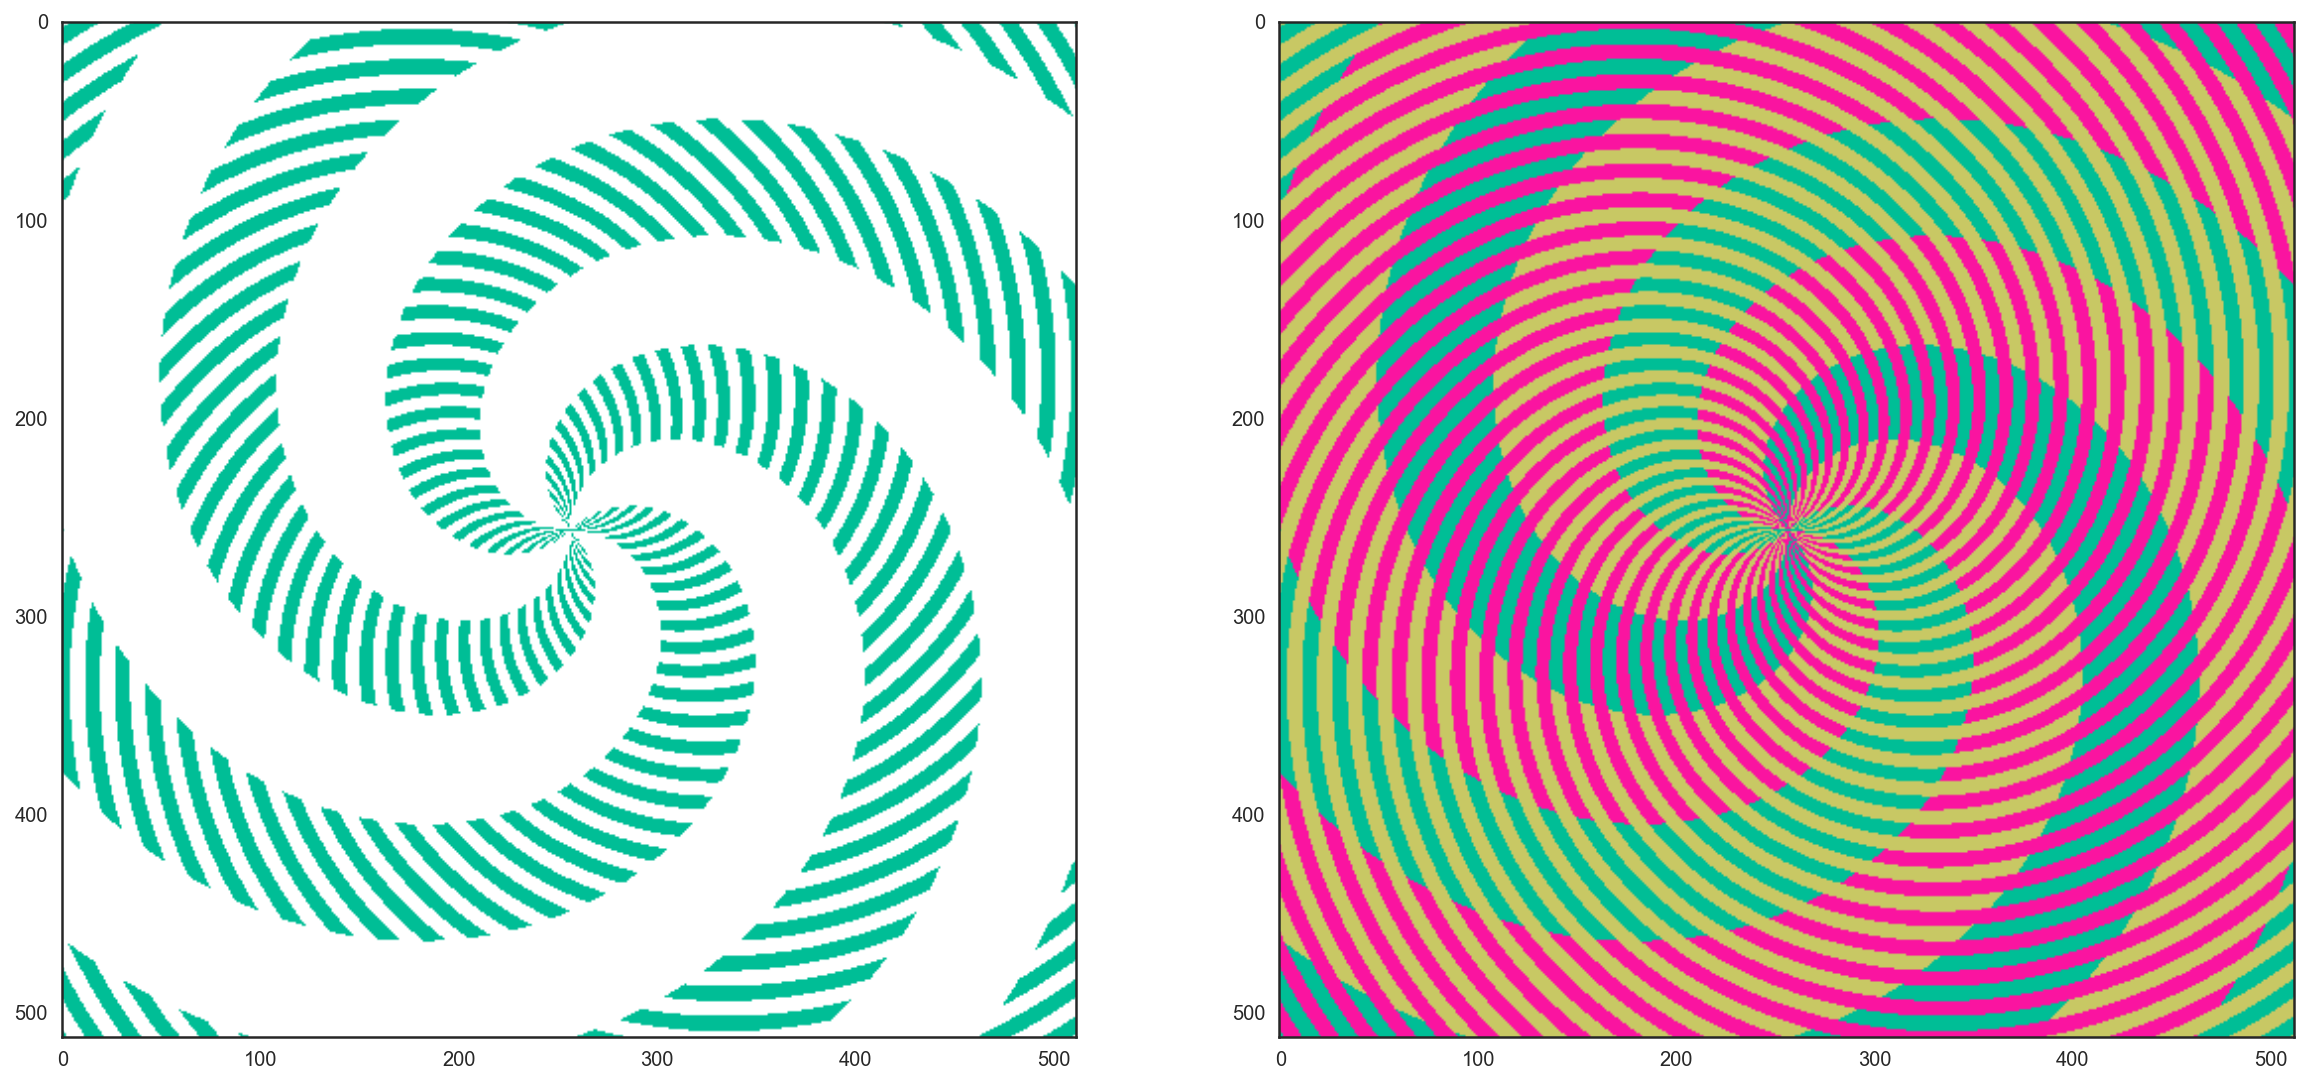

In [7]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=((20,10)))
    ax[0].imshow(im)
    ax[1].imshow(im_original)

Seems like our brain got fooled there.